# THE DARK SIDE OF ALGORITHMIC TRADING SECRETS WALL STREET WONT’T TELL YOU


### Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


## Financial Data (2016 - 2024)
# for Apple 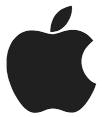 , Netflix 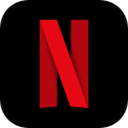, and NVIDIA 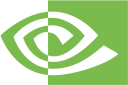

In [2]:
tickers = ['AAPL', 'NFLX', 'NVDA']
start_date = '2016-01-01'
end_date = '2024-01-01'

# Downloading the stock data
stock_data = yf.download(tickers, start=start_date, end=end_date)

# first few rows of the data
stock_data.head()


[*********************100%***********************]  3 of 3 completed


Price                      Adj Close                            Close  \
Ticker                          AAPL        NFLX      NVDA       AAPL   
Date                                                                    
2016-01-04 00:00:00+00:00  23.886835  109.959999  0.789926  26.337500   
2016-01-05 00:00:00+00:00  23.288250  107.660004  0.802615  25.677500   
2016-01-06 00:00:00+00:00  22.832502  117.680000  0.769427  25.174999   
2016-01-07 00:00:00+00:00  21.868864  114.559998  0.738923  24.112499   
2016-01-08 00:00:00+00:00  21.984503  111.389999  0.723062  24.240000   

Price                                                High              \
Ticker                           NFLX     NVDA       AAPL        NFLX   
Date                                                                    
2016-01-04 00:00:00+00:00  109.959999  0.80925  26.342501  110.000000   
2016-01-05 00:00:00+00:00  107.660004  0.82225  26.462500  110.580002   
2016-01-06 00:00:00+00:00  117.680000  0.78825  25.592501  117.910004   
2016-01-07 00:00:00+00:00  114.559998  0.75700  25.032499  122.180000   
2016-01-08 00:00:00+00:00  111.389999  0.74075  24.777500  117.720001   

Price                                     Low                            Open  \
Ticker                        NVDA       AAPL        NFLX     NVDA       AAPL   
Date                                                                            
2016-01-04 00:00:00+00:00  0.81450  25.500000  105.209999  0.80100  25.652500   
2016-01-05 00:00:00+00:00  0.83600  25.602501  105.849998  0.81250  26.437500   
2016-01-06 00:00:00+00:00  0.81250  24.967501  104.959999  0.77900  25.139999   
2016-01-07 00:00:00+00:00  0.77375  24.107500  112.290001  0.74700  24.670000   
2016-01-08 00:00:00+00:00  0.76750  24.190001  111.099998  0.73925  24.637501   

Price                                              Volume                       
Ticker                           NFLX     NVDA       AAPL      NFLX       NVDA  
Date                                                                            
2016-01-04 00:00:00+00:00  109.000000  0.80725  270597600  20794800  358076000  
2016-01-05 00:00:00+00:00  110.449997  0.82450  223164000  17664600  490272000  
2016-01-06 00:00:00+00:00  105.290001  0.80875  273829600  33045700  449344000  
2016-01-07 00:00:00+00:00  116.360001  0.76850  324377600  33636700  645304000  
2016-01-08 00:00:00+00:00  116.330002  0.76675  283192000  18067100  398472000

## Calculating Moving Averages

In [3]:
# Calculating the moving averages for each company
for ticker in tickers:
    stock_data[f'{ticker}_SMA_50'] = stock_data['Close'][ticker].rolling(window=50).mean()
    stock_data[f'{ticker}_SMA_200'] = stock_data['Close'][ticker].rolling(window=200).mean()

# data shown with moving averages
stock_data.tail()
stock_data.to_csv('/Users/chethankarunakara/Desktop/WallStreet_Secret/MovingAVG_data.csv')


KeyError: 'AAPL_Position'

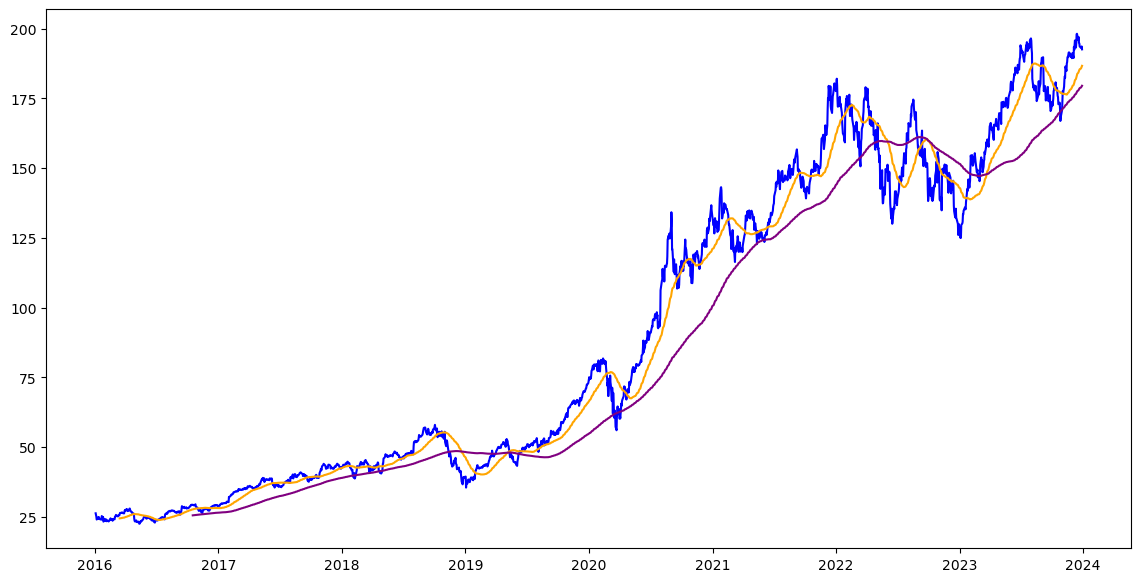

In [4]:
for ticker in tickers:
    plt.figure(figsize=(14, 7))

    # Plot the closing price and moving averages
    plt.plot(stock_data.index, stock_data['Close'][ticker], label=f'{ticker} Close Price', color='blue')
    plt.plot(stock_data.index, stock_data[f'{ticker}_SMA_50'], label=f'{ticker} 50-Day SMA', color='orange')
    plt.plot(stock_data.index, stock_data[f'{ticker}_SMA_200'], label=f'{ticker} 200-Day SMA', color='purple')

    # Plot the buy signals
    plt.plot(stock_data[stock_data[f'{ticker}_Position'] == 1].index, 
             stock_data[f'{ticker}_SMA_50'][stock_data[f'{ticker}_Position'] == 1], 
             '^', markersize=12, color='g', lw=0, label='Buy Signal')

    # Plot the sell signals
    plt.plot(stock_data[stock_data[f'{ticker}_Position'] == -1].index, 
             stock_data[f'{ticker}_SMA_50'][stock_data[f'{ticker}_Position'] == -1], 
             'v', markersize=12, color='r', lw=0, label='Sell Signal')

    plt.title(f'{ticker} Trading Strategy (2016 - 2024)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()



## Generating Buy/Sell Signals

In [5]:
# Generate buy/sell signals for each company
for ticker in tickers:
    stock_data[f'{ticker}_Signal'] = 0  # Initialize the Signal column
    condition = stock_data[f'{ticker}_SMA_50'] > stock_data[f'{ticker}_SMA_200']
    stock_data.loc[condition, f'{ticker}_Signal'] = 1
    stock_data.loc[~condition, f'{ticker}_Signal'] = -1
    stock_data[f'{ticker}_Position'] = stock_data[f'{ticker}_Signal'].diff()


**Check Position Calculation**

In [6]:
# Ensure position is calculated correctly
for ticker in tickers:
    stock_data[f'{ticker}_Position'] = stock_data[f'{ticker}_Signal'].diff()


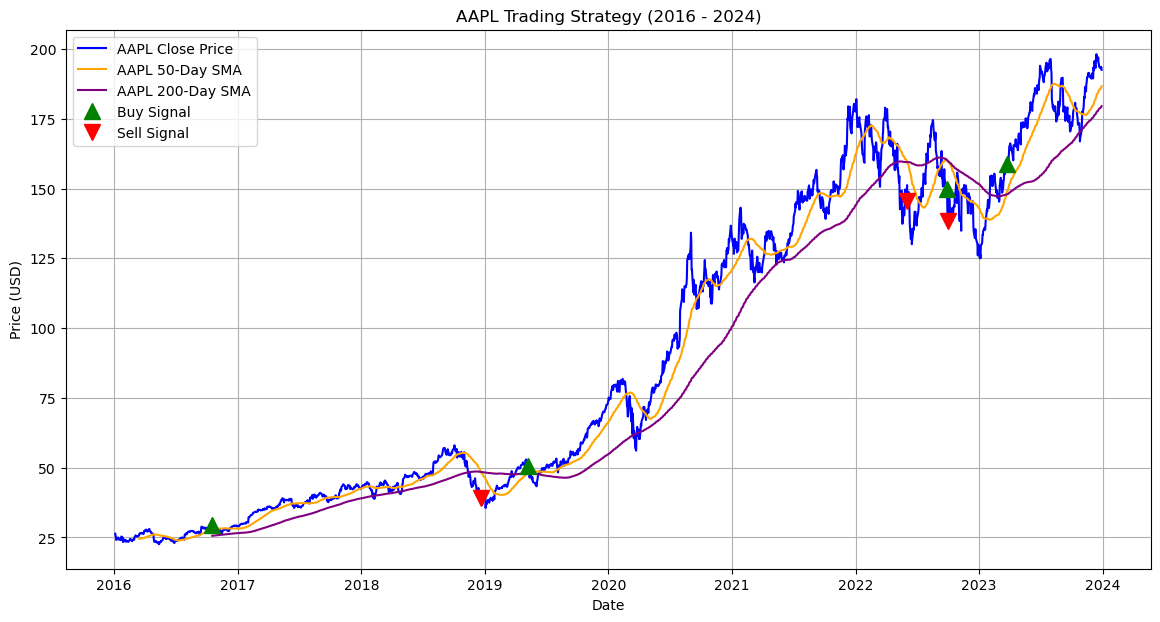

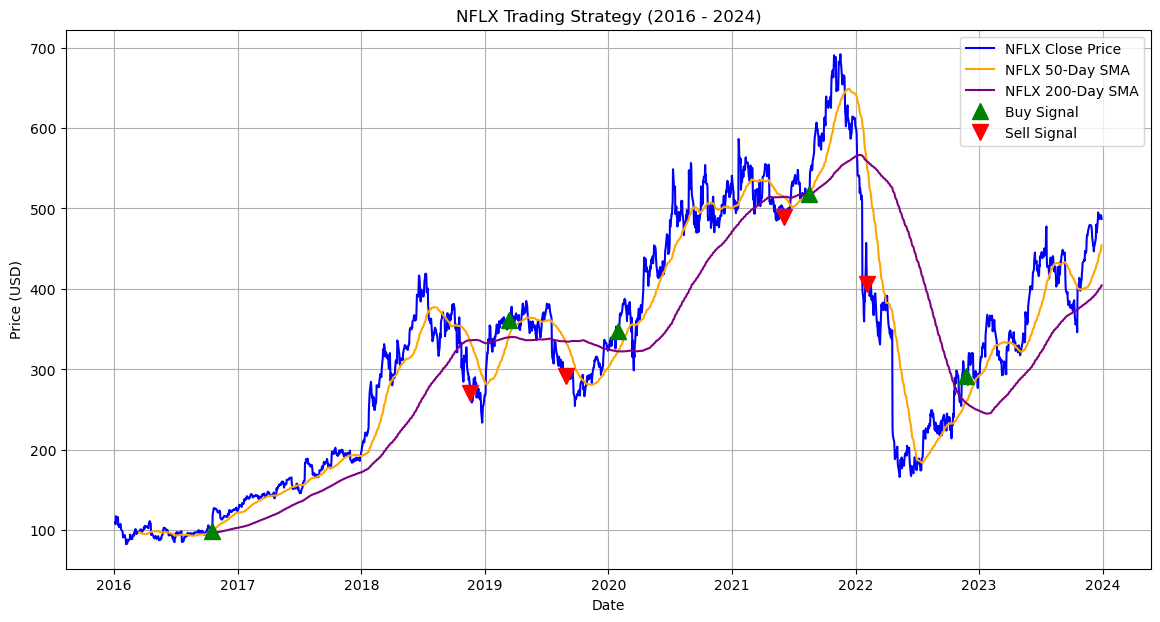

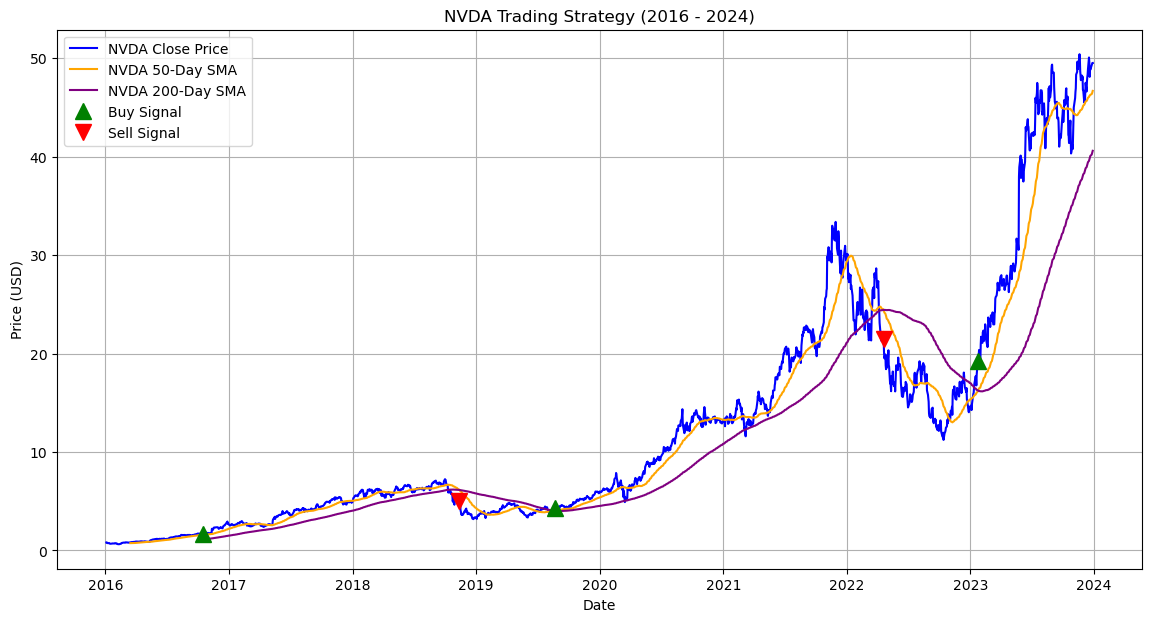

In [7]:
for ticker in tickers:
    plt.figure(figsize=(14, 7))
    
    plt.plot(stock_data.index, stock_data['Close'][ticker], label=f'{ticker} Close Price', color='blue')
    plt.plot(stock_data.index, stock_data[f'{ticker}_SMA_50'], label=f'{ticker} 50-Day SMA', color='orange')
    plt.plot(stock_data.index, stock_data[f'{ticker}_SMA_200'], label=f'{ticker} 200-Day SMA', color='purple')
    
    # Plot buy and sell signals
    plt.plot(stock_data[stock_data[f'{ticker}_Position'] == 2].index, 
             stock_data['Close'][ticker][stock_data[f'{ticker}_Position'] == 2], 
             '^', markersize=12, color='g', lw=0, label='Buy Signal')
        
    plt.plot(stock_data[stock_data[f'{ticker}_Position'] == -2].index, 
             stock_data['Close'][ticker][stock_data[f'{ticker}_Position'] == -2], 
             'v', markersize=12, color='r', lw=0, label='Sell Signal')
    
    plt.title(f'{ticker} Trading Strategy (2016 - 2024)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


## **Visualizing the Trading Strategy for Each Company**
**Let's plot the closing prices along with the moving averages and the buy/sell signals for each company:**

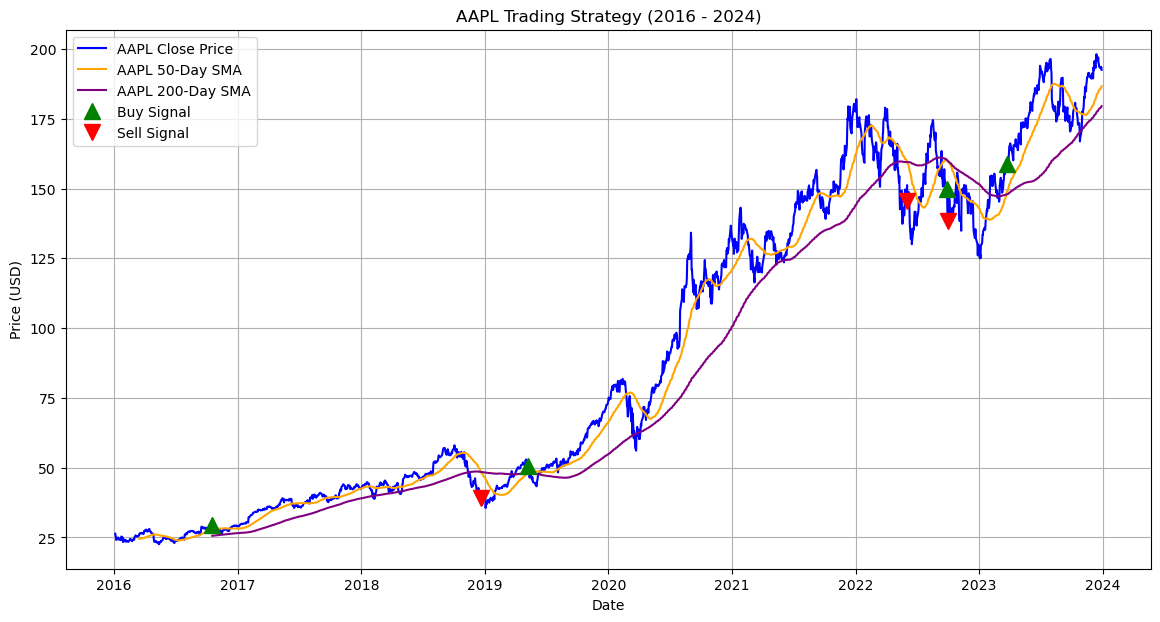

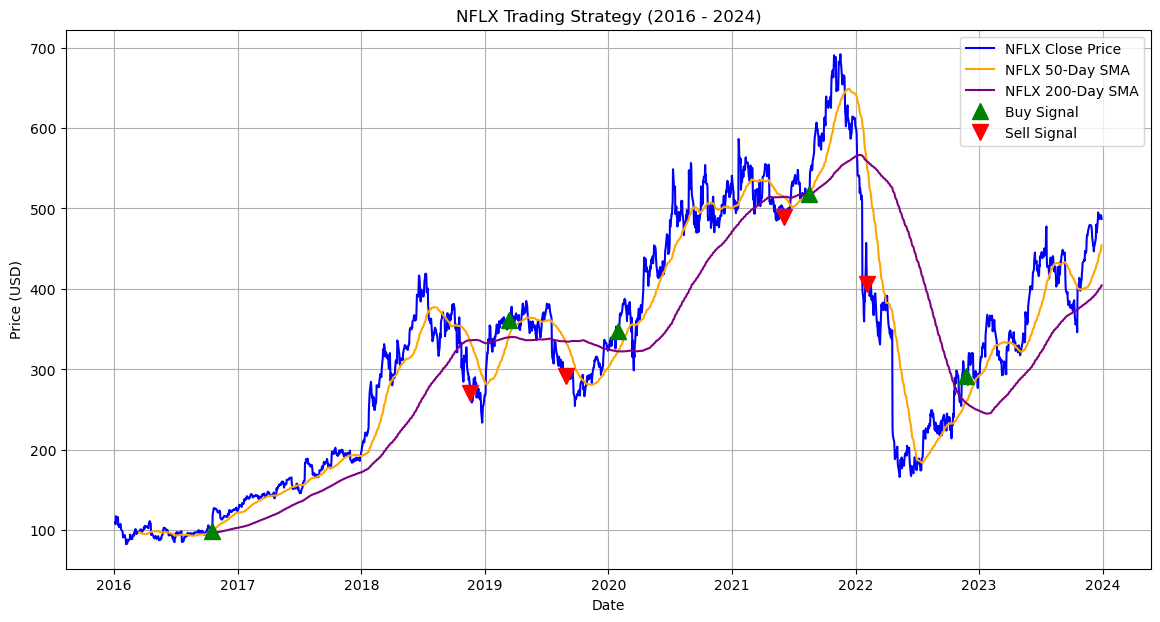

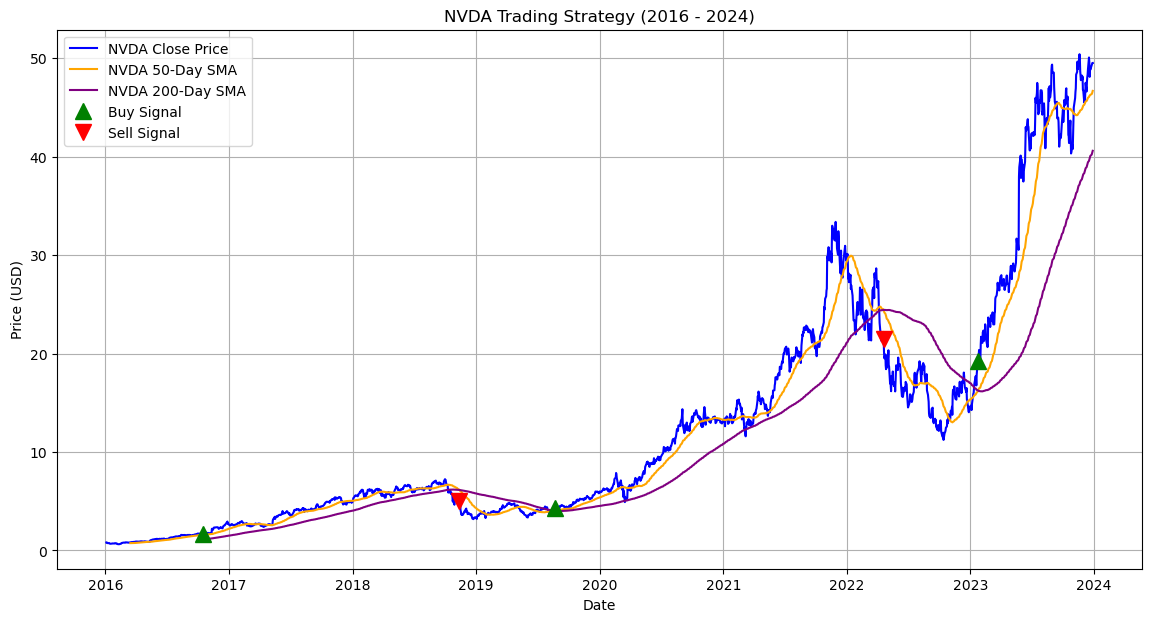

In [8]:
for ticker in tickers:
    plt.figure(figsize=(14, 7))
    
    # Plot the closing price and moving averages
    plt.plot(stock_data.index, stock_data['Close'][ticker], label=f'{ticker} Close Price', color='blue')
    plt.plot(stock_data.index, stock_data[f'{ticker}_SMA_50'], label=f'{ticker} 50-Day SMA', color='orange')
    plt.plot(stock_data.index, stock_data[f'{ticker}_SMA_200'], label=f'{ticker} 200-Day SMA', color='purple')
    
    # Plot the buy signals
    plt.plot(stock_data[stock_data[f'{ticker}_Position'] == 2].index, 
             stock_data['Close'][ticker][stock_data[f'{ticker}_Position'] == 2], 
             '^', markersize=12, color='g', lw=0, label='Buy Signal')
    
    # Plot the sell signals
    plt.plot(stock_data[stock_data[f'{ticker}_Position'] == -2].index, 
             stock_data['Close'][ticker][stock_data[f'{ticker}_Position'] == -2], 
             'v', markersize=12, color='r', lw=0, label='Sell Signal')
    
    plt.title(f'{ticker} Trading Strategy (2016 - 2024)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


## Comparing the Cumulative Returns of the Strategies:

**Finally, let's compare the cumulative returns of the trading strategies across the three companies:**



In [9]:
for ticker in tickers:
    # Calculate daily returns
    stock_data[f'{ticker}_Market_Returns'] = stock_data['Close'][ticker].pct_change()
    
    # Calculate strategy returns based on position
    stock_data[f'{ticker}_Strategy_Returns'] = stock_data[f'{ticker}_Market_Returns'] * stock_data[f'{ticker}_Position'].shift(1)
    
    # Calculate cumulative returns
    stock_data[f'{ticker}_Cumulative_Market_Returns'] = (1 + stock_data[f'{ticker}_Market_Returns']).cumprod()
    stock_data[f'{ticker}_Cumulative_Strategy_Returns'] = (1 + stock_data[f'{ticker}_Strategy_Returns']).cumprod()


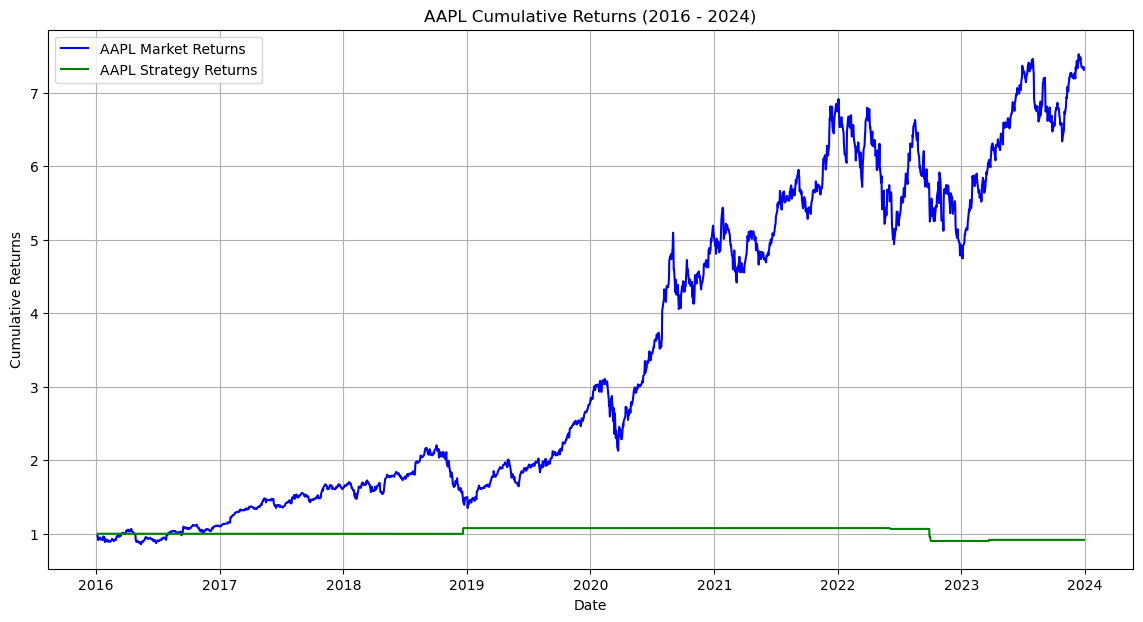

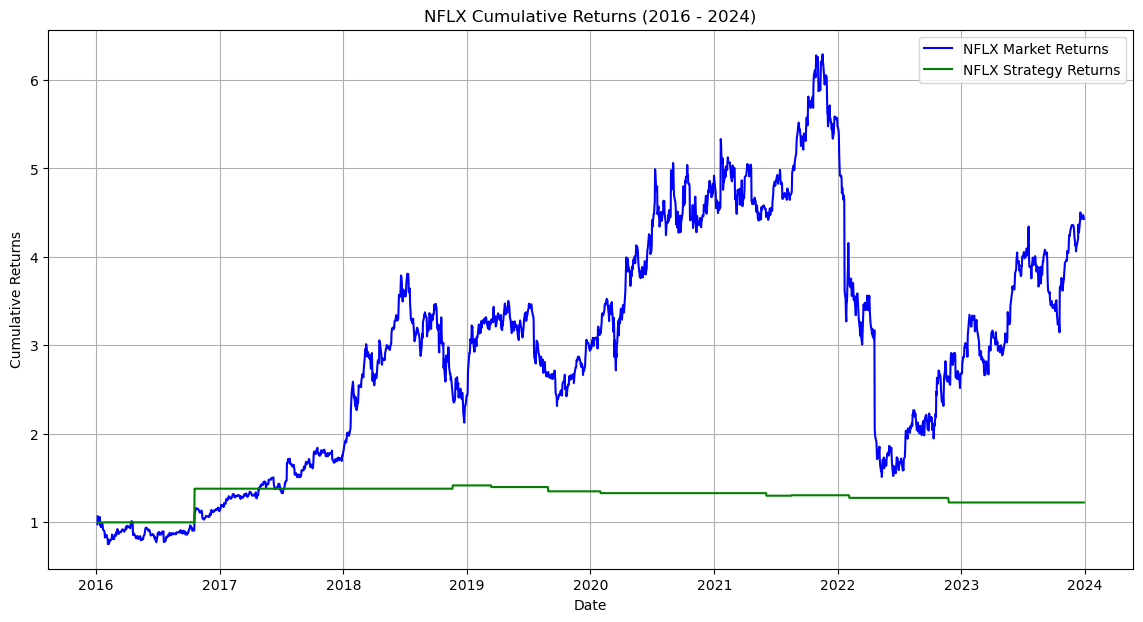

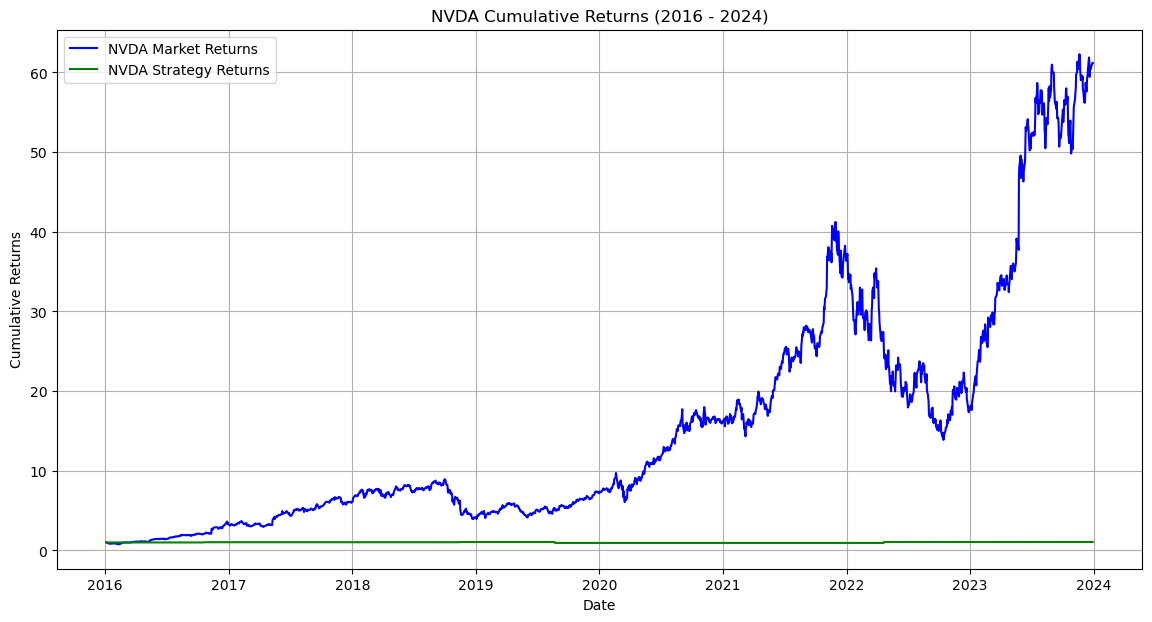

In [10]:
for ticker in tickers:
    plt.figure(figsize=(14, 7))
    
    # Plot cumulative market returns
    plt.plot(stock_data.index, stock_data[f'{ticker}_Cumulative_Market_Returns'], label=f'{ticker} Market Returns', color='blue')
    
    # Plot cumulative strategy returns
    plt.plot(stock_data.index, stock_data[f'{ticker}_Cumulative_Strategy_Returns'], label=f'{ticker} Strategy Returns', color='green')
    
    plt.title(f'{ticker} Cumulative Returns (2016 - 2024)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


## Code Example: Simple Moving Average Crossover Strategy

## Trade Decision=f(Price,Volume,Moving Averages,RSI,Momentum,Other Indicators)
**Around the central formula, you can depict each of the inputs:**

1.**Price**: Represented by a line chart showing the price movement over time.

2.**Volume**: A bar chart indicating the trading volume.

3.**Moving Averages:** Two lines (short-term and long-term) crossing each other.

4.**RSI (Relative Strength Index):** An oscillating line within a bounded range (e.g., 0-100) to represent momentum.

5.**Momentum:** An arrow or a gradient that increases as momentum builds.

6.**Other Indicators:** You could use symbols like MACD (Moving Average Convergence Divergence) or Bollinger Bands.

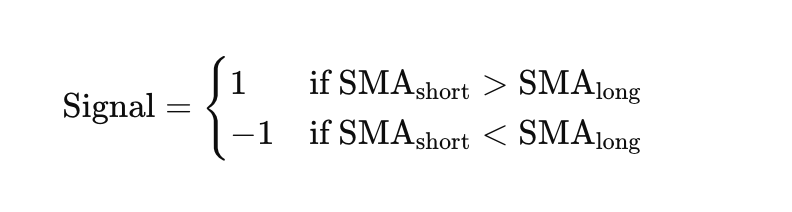

## Visualize the Trap
**Let’s visualize this with Python. We’ll create a scenario where two variables (oil prices and airline stocks) appear to be correlated but have no causal relationship.**

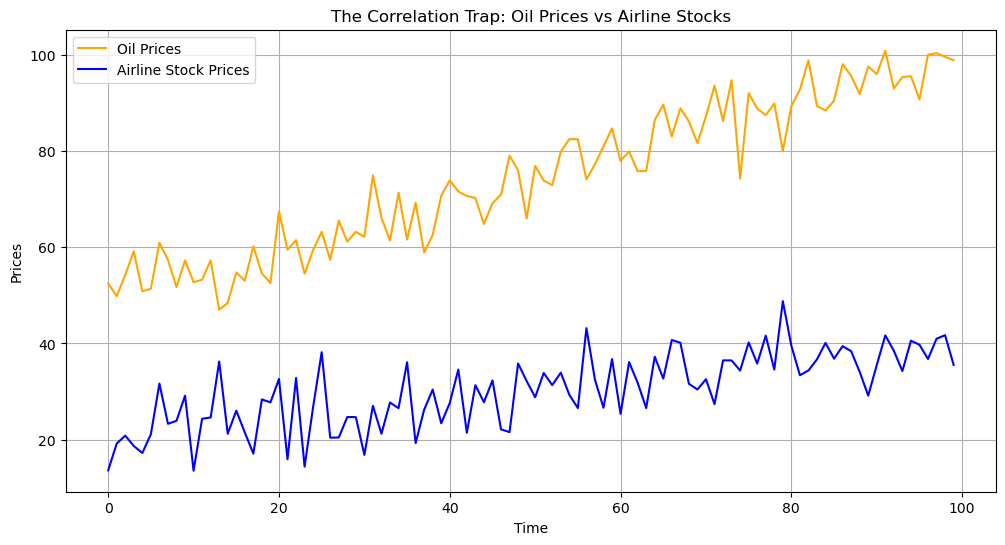

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Create random data to simulate oil prices and airline stock prices
np.random.seed(42)
dates = np.arange(100)
oil_prices = np.linspace(50, 100, 100) + np.random.normal(0, 5, 100)  # Simulated oil prices
airline_stocks = np.linspace(20, 40, 100) + np.random.normal(0, 5, 100)  # Simulated airline stock prices

# Adding a random factor to show no causation
random_factor = np.random.normal(0, 2, 100)
airline_stocks += random_factor

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(dates, oil_prices, label='Oil Prices', color='orange')
plt.plot(dates, airline_stocks, label='Airline Stock Prices', color='blue')
plt.title('The Correlation Trap: Oil Prices vs Airline Stocks')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()


## Renaissance Technologies (RenTec) Model Changing :


### Python Code Snippets:
### 1.Reversion-to-the-Mean Strategy:



In [12]:
import numpy as np

# Calculate the long-term mean of the closing prices
long_term_mean = stock_data['Close'].rolling(window=200).mean()

# Generate buy/sell signals based on reversion to the mean
signals = np.where(stock_data['Close'] < long_term_mean, 1, -1)


### Hidden Markov Model (HMM) for Market States:

In [13]:
from hmmlearn import hmm
import numpy as np

# Prepare your data (returns or price differences)
returns = np.diff(np.log(stock_data['Close'].values))

# Reshape data for HMM
returns = returns.reshape(-1, 1)

# Define and fit an HMM model
model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=1000)
model.fit(returns)

# Predict the market states (hidden states)
hidden_states = model.predict(returns)


## Statistical Arbitrage (Pairs Trading):

### To implement this strategy, we'll need to gather and analyze stock data for NVIDIA, Netflix, and Apple, along with the companies that are closely related to their operations. The idea is to see if there’s any significant cointegration between these primary companies and their associated or competing companies. Here's how we can approach it:

### Step 1: Identify Related Companies

#### NVIDIA :
Raw Materials Providers:

ASML Holding NV (ASML): Supplies photolithography machines, critical in semiconductor manufacturing.
Applied Materials (AMAT): Provides equipment, services, and software for the semiconductor industry.
Supply Chain Companies:

Flex Ltd. (FLEX): Provides design, engineering, manufacturing, and supply chain services.
Jabil Inc. (JBL): Offers manufacturing services for electronics, including components used by NVIDIA.

Last Mile Delivery Companies:
FedEx (FDX): Global shipping and logistics.
United Parcel Service (UPS): Offers supply chain and logistics solutions.

Semiconductor Companies:
Intel Corporation (INTC): Another major player in the semiconductor industry.
Advanced Micro Devices (AMD): A direct competitor and collaborator in the semiconductor space.

#### Netflix:
Content Producers: Lionsgate (LGF.A), Sony Pictures (SONY), Warner Bros. Discovery (WBD)
Data Centers: Equinix (EQIX), Digital Realty Trust (DLR)
Collaborators: Spotify (SPOT), Shopify (SHOP)
Competitors: Disney (DIS), Paramount (PARA), Amazon Prime Video (AMZN

#### Apple:
Supply Chain: Foxconn (HNHPF), TSMC (TSM), Broadcom (AVGO)
Distributors: Best Buy (BBY), Walmart (WMT)
Competitors: Samsung (SSNLF), Google (GOOGL), Microsoft (MSFT)
Semiconductor Companies: TSMC (TSM), Intel (INTC), Broadcom (AVGO)

### Step 2: Gatherring Data
We’ll use yfinance to download the stock data for these companies over the same period (2016-2024).

### Step 3: Performing Cointegration Tests
We’ll test for cointegration between the primary company and each of its related companies. If a significant cointegration is found, it could be used as a basis for pairs trading or other strategies.

In [14]:
from statsmodels.tsa.stattools import coint

# The company ticker symbols
nvidia_related = ['NVDA', 'AMZN', 'MSFT', 'GOOGL', 'TSLA', 'ASML', 'AMAT', 'FLEX', 'JBL', 'INTC', 'AMD', 'FDX', 'UPS']
netflix_related = ['NFLX', 'DIS', 'PARA', 'AMZN', 'LGF.A', 'SONY', 'WBD', 'SPOT', 'EQIX', 'DLR']
apple_related = ['AAPL', 'HNHPF', 'TSM', 'AVGO', 'BBY', 'WMT', 'SSNLF', 'GOOGL', 'MSFT', 'INTC']

start_date = '2016-01-01'
end_date = '2024-01-01'

# Downloading stock data for each group
nvidia_data = yf.download(nvidia_related, start=start_date, end=end_date)['Close']
netflix_data = yf.download(netflix_related, start=start_date, end=end_date)['Close']
apple_data = yf.download(apple_related, start=start_date, end=end_date)['Close']

# Handling missing data by forward filling the missing values
nvidia_data.ffill(inplace=True)
netflix_data.ffill(inplace=True)
apple_data.ffill(inplace=True)

# Drop columns that are entirely NaN after forward-filling
nvidia_data.dropna(axis=1, how='all', inplace=True)
netflix_data.dropna(axis=1, how='all', inplace=True)
apple_data.dropna(axis=1, how='all', inplace=True)

# Drop rows with any remaining NaN or inf values
nvidia_data.replace([np.inf, -np.inf], np.nan, inplace=True)
netflix_data.replace([np.inf, -np.inf], np.nan, inplace=True)
apple_data.replace([np.inf, -np.inf], np.nan, inplace=True)

nvidia_data.dropna(inplace=True)
netflix_data.dropna(inplace=True)
apple_data.dropna(inplace=True)

# Perform cointegration tests
def cointegration_test(data):
    for i in range(len(data.columns)):
        for j in range(i + 1, len(data.columns)):
            stock1 = data.iloc[:, i]
            stock2 = data.iloc[:, j]
            score, p_value, _ = coint(stock1, stock2)
            print(f"{data.columns[i]}-{data.columns[j]} p-value: {p_value}")

# Cointegration tests for NVIDIA, Netflix, and Apple with their related companies
print("NVIDIA and related companies:")
cointegration_test(nvidia_data)

print("\nNetflix and related companies:")
cointegration_test(netflix_data)

print("\nApple and related companies:")
cointegration_test(apple_data)


[*********************100%***********************]  13 of 13 completed
[*********************100%***********************]  9 of 10 completed

1 Failed download:
['LGF.A']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  10 of 10 completed


NVIDIA and related companies:
AMAT-AMD p-value: 0.25983576306582956
AMAT-AMZN p-value: 0.8647033873096592
AMAT-ASML p-value: 0.24203886229186572
AMAT-FDX p-value: 0.8657832676971605
AMAT-FLEX p-value: 0.5665006295875615
AMAT-GOOGL p-value: 0.05258233175756988
AMAT-INTC p-value: 0.9751588059537518
AMAT-JBL p-value: 0.7471346008494384
AMAT-MSFT p-value: 0.3543565043048269
AMAT-NVDA p-value: 0.750351146041804
AMAT-TSLA p-value: 0.13492174500870874
AMAT-UPS p-value: 0.5808810967420863
AMD-AMZN p-value: 0.747004514398239
AMD-ASML p-value: 0.18643060694318297
AMD-FDX p-value: 0.9357130096536964
AMD-FLEX p-value: 0.7897210477402399
AMD-GOOGL p-value: 0.034146792099973546
AMD-INTC p-value: 0.9767044861347658
AMD-JBL p-value: 0.5023205890061654
AMD-MSFT p-value: 0.0015201386461560135
AMD-NVDA p-value: 0.7592595076077384
AMD-TSLA p-value: 0.12386998441518532
AMD-UPS p-value: 0.8015395171718733
AMZN-ASML p-value: 0.5318262592064658
AMZN-FDX p-value: 0.723573032453407
AMZN-FLEX p-value: 0.76330093

## Based on the p-values obtained from the cointegration tests, here’s a breakdown of the significant findings:

### NVIDIA and Related Companies:

Significant Cointegration:
AMD-MSFT: p-value = 0.0015 (Strong cointegration)
JBL-NVDA: p-value = 0.0166 (Significant cointegration)
ASML-GOOGL: p-value = 0.0216 (Significant cointegration)
ASML-TSLA: p-value = 0.0334 (Significant cointegration)
AMD-GOOGL: p-value = 0.0341 (Significant cointegration)
TSLA-UPS: p-value = 0.0068 (Strong cointegration)

#### Near-Significant Cointegration:

GOOGL-TSLA: p-value = 0.0574 (Close to significant)
AMAT-GOOGL: p-value = 0.0526 (Close to significant)

### Netflix and Related Companies:

Near-Significant Cointegration:

AMZN-DLR: p-value = 0.0772 (Close to significant)
NFLX-SPOT: p-value = 0.0807 (Close to significant)
DLR-SPOT: p-value = 0.0956 (Close to significant)

While no pairs in the Netflix-related group showed strong cointegration, some pairs are close to significance and may warrant further investigation.

### Apple and Related Companies:

#### Significant Cointegration:

MSFT-WMT: p-value = 0.0410 (Significant cointegration)

#### Near-Significant Cointegration:

GOOGL-MSFT: p-value = 0.2293 (Close to significant)
Conclusions and Recommendations:
NVIDIA:

AMD-MSFT and JBL-NVDA: These pairs show strong cointegration, indicating that their price movements are closely linked. This could present opportunities for pairs trading.
ASML-TSLA and TSLA-UPS: These pairs also demonstrate significant relationships and might be worth exploring further.
Netflix:

AMZN-DLR and NFLX-SPOT: Although these pairs do not show strong cointegration, they are close enough to significance to suggest potential opportunities for monitoring or more in-depth analysis.
Apple:

MSFT-WMT: This pair shows significant cointegration, suggesting a potential trading opportunity based on the relationship between these two companies.
GOOGL-MSFT: While not quite significant, this pair is close and could be worth considering.

# Selected Pairs for Regression Models:

### NVIDIA and Related Companies:

Significant:
AMD-MSFT (p-value: 0.0015)
JBL-NVDA (p-value: 0.0166)
ASML-GOOGL (p-value: 0.0216)
ASML-TSLA (p-value: 0.0334)
TSLA-UPS (p-value: 0.0068)

Near-Significant:
GOOGL-TSLA (p-value: 0.0574)
AMAT-GOOGL (p-value: 0.0526)

### Netflix and Related Companies:

Near-Significant:
AMZN-DLR (p-value: 0.0772)
NFLX-SPOT (p-value: 0.0807)
DLR-SPOT (p-value: 0.0956)

Apple and Related Companies:

Significant:
MSFT-WMT (p-value: 0.0410)
Near-Significant:
GOOGL-MSFT (p-value: 0.2293)

### Implementation with Multiple Regression Models:
We will develop a multiple regression model for each of these pairs, using one stock as the dependent variable and the other as the independent variable. This will allow us to predict the price of one stock based on the price of its cointegrated partner.

In [15]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint


# The company ticker symbols
nvidia_related = ['NVDA', 'AMZN', 'MSFT', 'GOOGL', 'TSLA', 'ASML', 'AMAT', 'FLEX', 'JBL', 'INTC', 'AMD', 'FDX', 'UPS']
netflix_related = ['NFLX', 'DIS', 'PARA', 'AMZN', 'LGF.A', 'SONY', 'WBD', 'SPOT', 'EQIX', 'DLR']
apple_related = ['AAPL', 'HNHPF', 'TSM', 'AVGO', 'BBY', 'WMT', 'SSNLF', 'GOOGL', 'MSFT', 'INTC']

start_date = '2016-01-01'
end_date = '2024-01-01'

# Downloading stock data for each group
nvidia_data = yf.download(nvidia_related, start=start_date, end=end_date)['Close']
netflix_data = yf.download(netflix_related, start=start_date, end=end_date)['Close']
apple_data = yf.download(apple_related, start=start_date, end=end_date)['Close']

# Handling missing data by forward filling the missing values
nvidia_data.ffill(inplace=True)
netflix_data.ffill(inplace=True)
apple_data.ffill(inplace=True)

# Drop columns that are entirely NaN after forward-filling
nvidia_data.dropna(axis=1, how='all', inplace=True)
netflix_data.dropna(axis=1, how='all', inplace=True)
apple_data.dropna(axis=1, how='all', inplace=True)

# Drop rows with any remaining NaN or inf values
nvidia_data.replace([np.inf, -np.inf], np.nan, inplace=True)
netflix_data.replace([np.inf, -np.inf], np.nan, inplace=True)
apple_data.replace([np.inf, -np.inf], np.nan, inplace=True)

nvidia_data.dropna(inplace=True)
netflix_data.dropna(inplace=True)
apple_data.dropna(inplace=True)

# Function to run multiple regression on cointegrated pairs
def run_regression(data, pairs):
    for pair in pairs:
        stock1 = data[pair[0]]
        stock2 = data[pair[1]]
        
        # Add a constant to the independent variable
        stock2 = sm.add_constant(stock2)
        
        # Perform the regression
        model = sm.OLS(stock1, stock2).fit()
        
        print(f"Regression results for {pair[0]} as dependent and {pair[1]} as independent variable:")
        print(model.summary())
        print("\n")

# Selected pairs for NVIDIA, Netflix, and Apple
nvidia_pairs = [('AMD', 'MSFT'), ('JBL', 'NVDA'), ('ASML', 'GOOGL'), ('ASML', 'TSLA'), ('TSLA', 'UPS'), 
                ('GOOGL', 'TSLA'), ('AMAT', 'GOOGL')]
netflix_pairs = [('AMZN', 'DLR'), ('NFLX', 'SPOT'), ('DLR', 'SPOT')]
apple_pairs = [('MSFT', 'WMT'), ('GOOGL', 'MSFT')]

# Running regressions for each group
print("NVIDIA and related companies:")
run_regression(nvidia_data, nvidia_pairs)

print("\nNetflix and related companies:")
run_regression(netflix_data, netflix_pairs)

print("\nApple and related companies:")
run_regression(apple_data, apple_pairs)


[*********************100%***********************]  13 of 13 completed
[*********************100%***********************]  10 of 10 completed

1 Failed download:
['LGF.A']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  10 of 10 completed


NVIDIA and related companies:
Regression results for AMD as dependent and MSFT as independent variable:
                            OLS Regression Results                            
Dep. Variable:                    AMD   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 4.092e+04
Date:                Sun, 01 Sep 2024   Prob (F-statistic):               0.00
Time:                        02:31:07   Log-Likelihood:                -7274.6
No. Observations:                2012   AIC:                         1.455e+04
Df Residuals:                    2010   BIC:                         1.456e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

## Conclusions and Recommendations
Based on the regression results, several key insights can be drawn regarding the relationship between the selected stocks, which can be leveraged for trading strategies:

### NVIDIA and Related Companies:

Significant Cointegration and Regression Models:

AMD as dependent, MSFT as independent: The R-squared value of 0.953 indicates a very strong relationship between AMD and MSFT. This suggests that changes in MSFT can predict changes in AMD with high accuracy.
JBL as dependent, NVDA as independent: The R-squared value of 0.919 is also very high, showing a strong predictive relationship between these two companies.
ASML as dependent, GOOGL as independent: With an R-squared value of 0.943, this pair also exhibits a strong relationship.

### Near-Significant Cointegration:

GOOGL as dependent, TSLA as independent: The R-squared value of 0.888 indicates a strong, though slightly weaker, relationship. This pair can still be useful in predictive modeling.

*Using the regression models for AMD-MSFT, JBL-NVDA, and ASML-GOOGL as the basis for pairs trading strategies. Given the high R-squared values, these pairs should provide reliable signals for entering and exiting trades. The GOOGL-TSLA pair, with its slightly lower but still strong R-squared value, can also be included in a diversified trading strategy.*

### Netflix and Related Companies:

Significant Cointegration and Regression Models:
NFLX as dependent, SPOT as independent: The R-squared value of 0.723 indicates a moderate-to-strong relationship, suggesting that changes in SPOT can reasonably predict changes in NFLX.

Near-Significant Cointegration:
AMZN as dependent, DLR as independent: The R-squared value of 0.642 suggests a moderate relationship, which can still be valuable in predicting stock price movements.

*Fosuing on the NFLX-SPOT pair for a more reliable trading strategy. The AMZN-DLR pair, while having a moderate R-squared, can be used as part of a broader strategy where diversification is key.*

### Apple and Related Companies:

Significant Cointegration and Regression Models:
MSFT as dependent, WMT as independent: The R-squared value of 0.897 suggests a strong relationship, making this pair a solid candidate for predictive trading.
GOOGL as dependent, MSFT as independent: The R-squared value of 0.941 indicates a very strong relationship, which can be reliably used for trading decisions.
Recommendation: The MSFT-WMT and GOOGL-MSFT pairs should be prioritized in trading models due to their strong predictive relationships. These pairs can provide reliable signals for trades, potentially leading to consistent returns.

## Final Trading Strategy:

### Model Construction:
Build trading models using the identified pairs with significant and near-significant cointegration.
Incorporate multiple regression models to predict future price movements based on the relationships between the stocks.
Apply a pairs trading strategy, where you long the underperforming stock and short the outperforming stock when the prices diverge from the predicted relationship.

### Monitoring and Adjustment:
Continuously monitor the performance of these models, and adjust the strategy based on new data and market conditions.
Consider adding more pairs to the model as more data becomes available or as market conditions change.

### Risk Management:
Implement robust risk management strategies, such as setting stop-loss levels and maintaining a diversified portfolio, to protect against adverse market movements.

# Demo Trading 

To get the trading model ready for a demo trading environment, we will create a script that uses the significant and near-significant cointegrated pairs to generate trading signals. The strategy will involve entering trades when the spread between the two stocks in a pair deviates from its historical mean (indicating a potential trading opportunity) and exiting when it reverts to the mean.



[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed


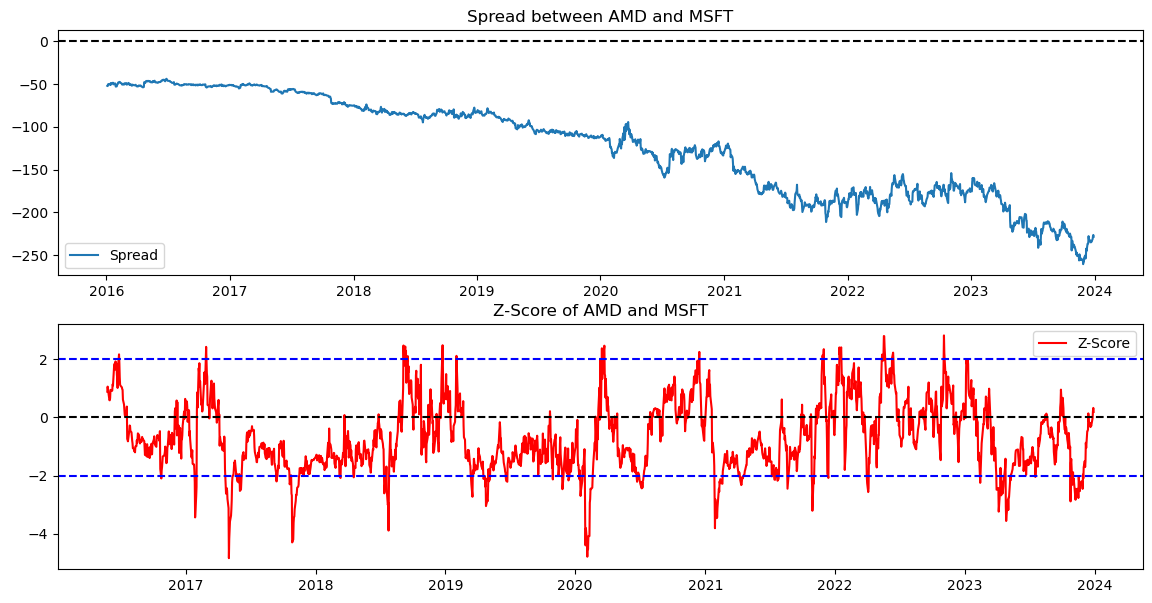

Trading strategy executed for pair: AMD and MSFT


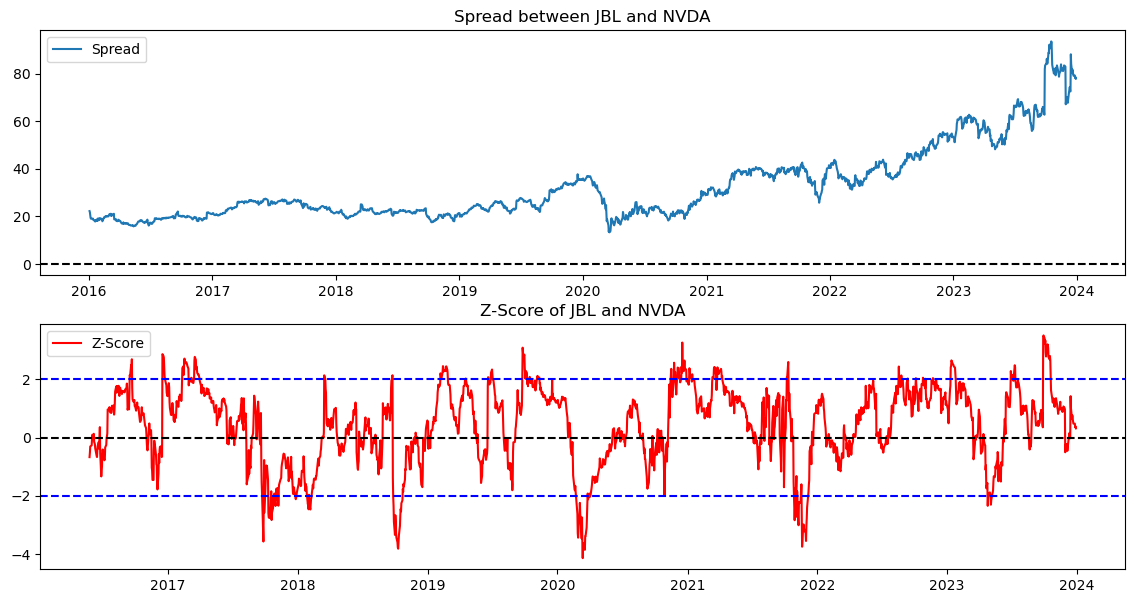

Trading strategy executed for pair: JBL and NVDA


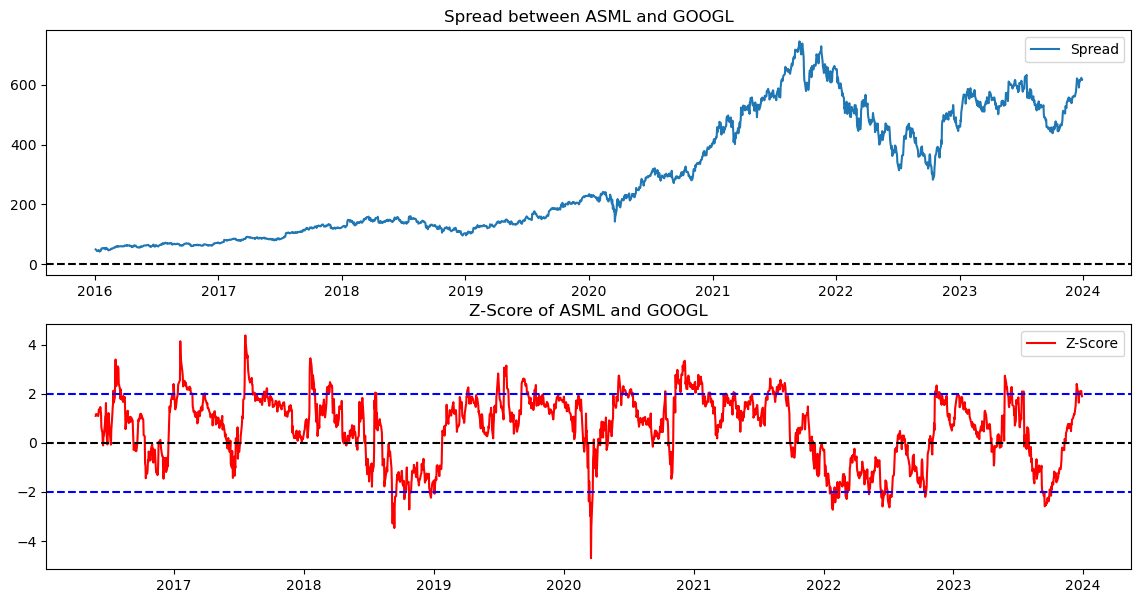

Trading strategy executed for pair: ASML and GOOGL


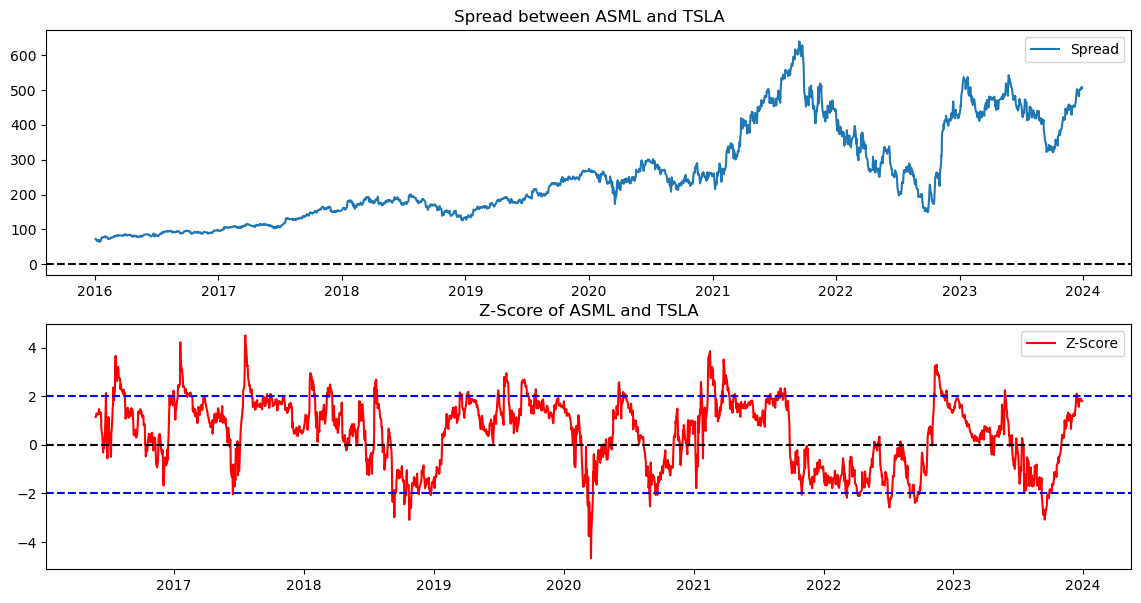

Trading strategy executed for pair: ASML and TSLA


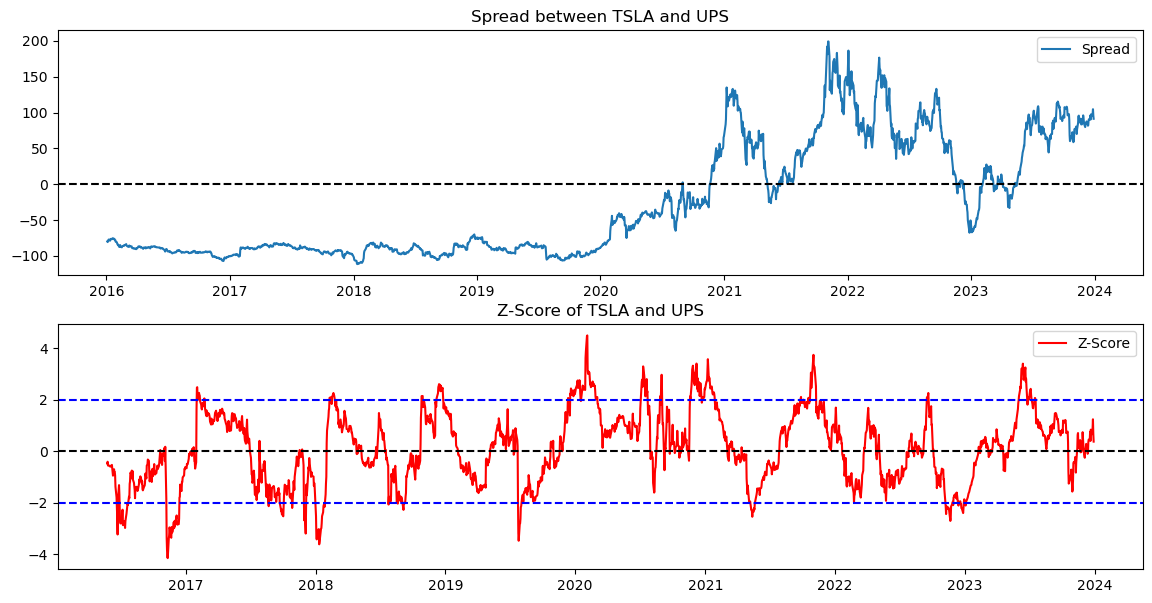

Trading strategy executed for pair: TSLA and UPS


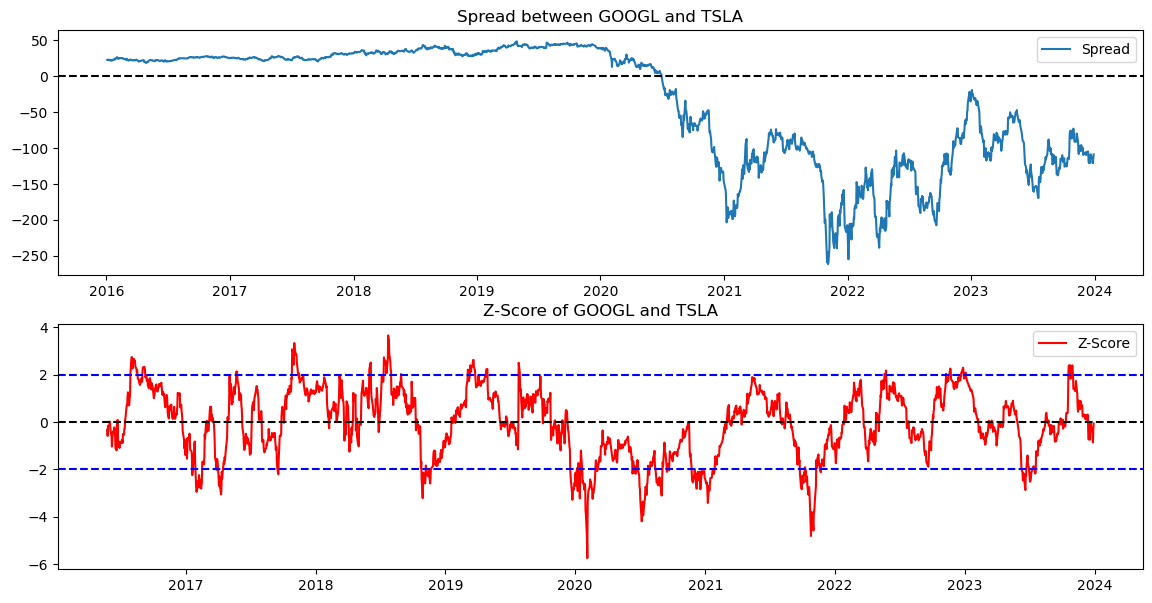

Trading strategy executed for pair: GOOGL and TSLA


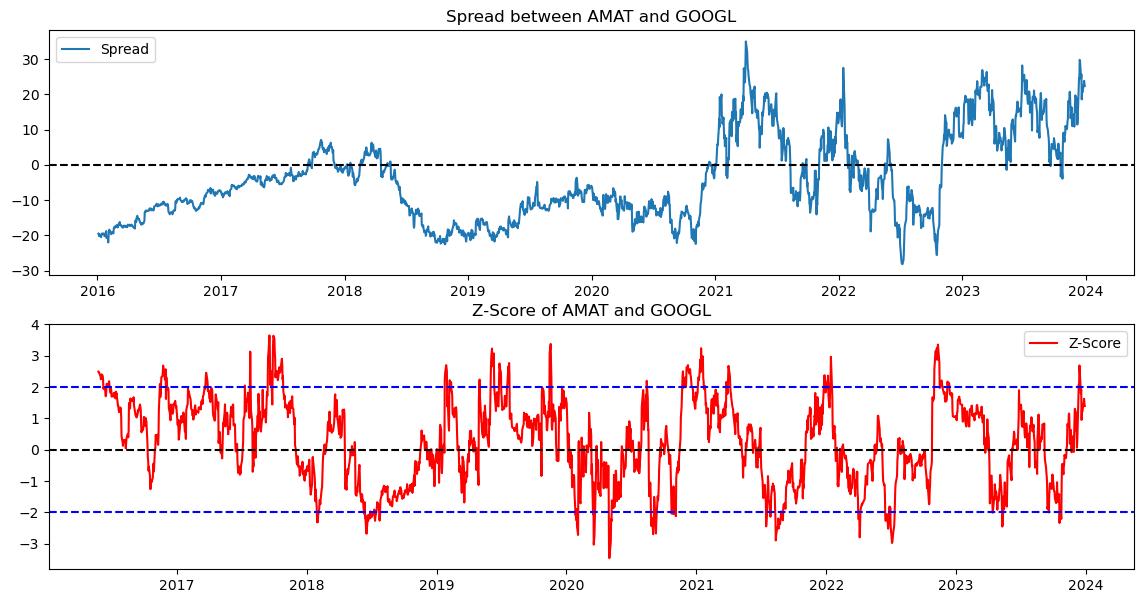

Trading strategy executed for pair: AMAT and GOOGL


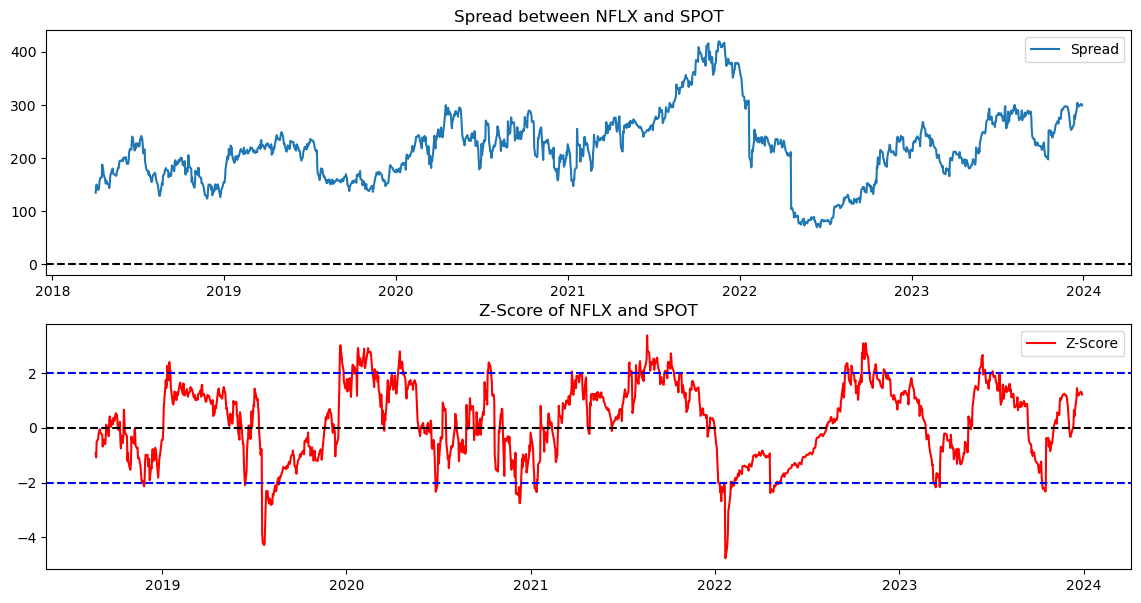

Trading strategy executed for pair: NFLX and SPOT


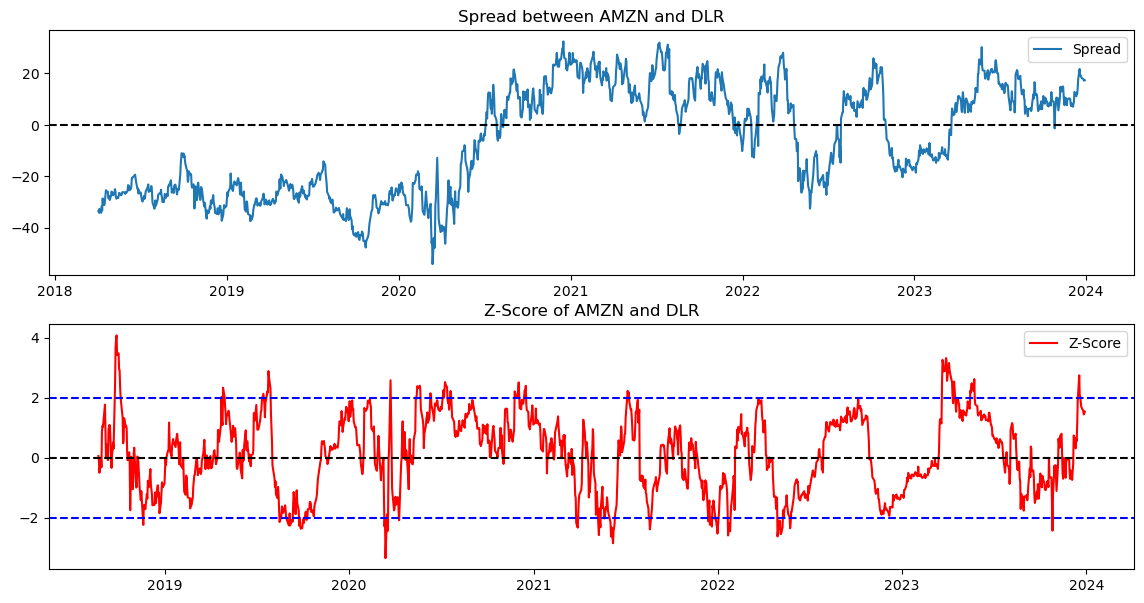

Trading strategy executed for pair: AMZN and DLR


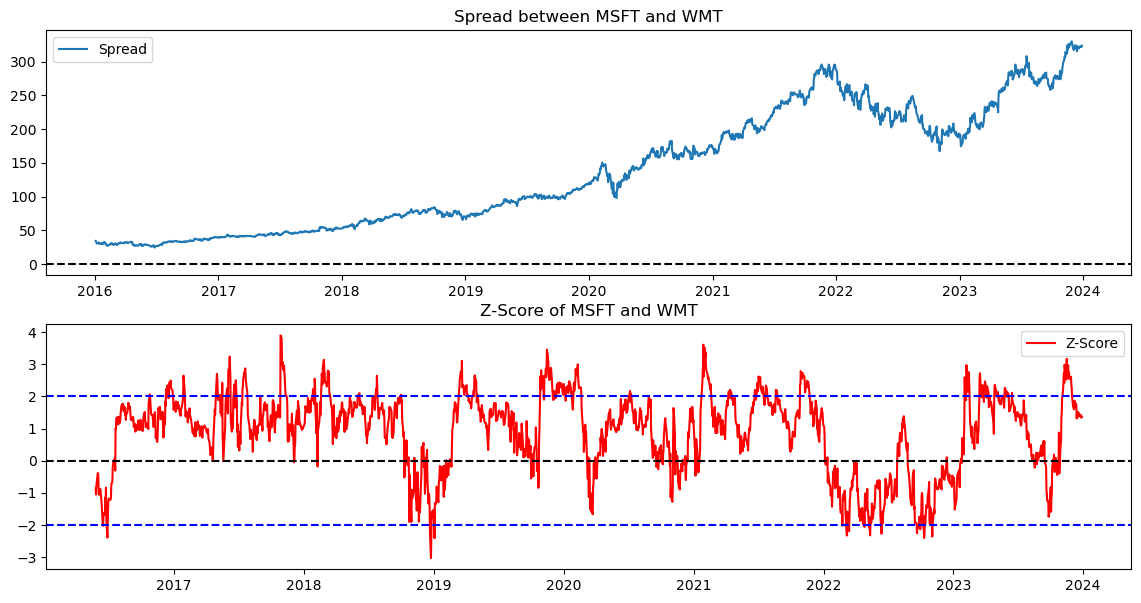

Trading strategy executed for pair: MSFT and WMT


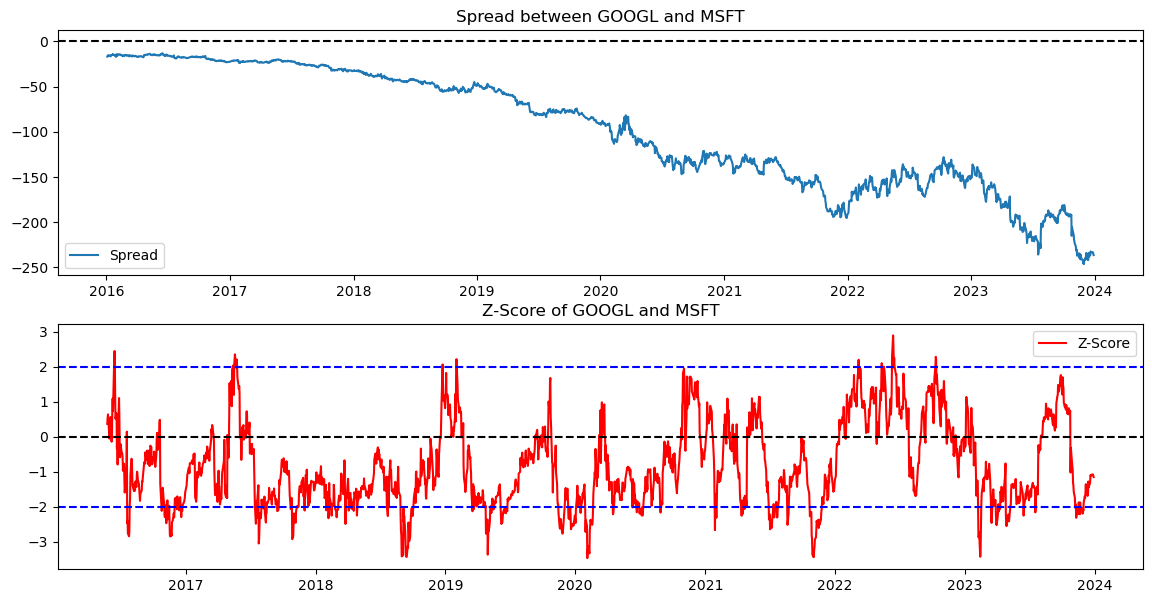

Trading strategy executed for pair: GOOGL and MSFT


In [16]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt

# Function to calculate the spread between two stocks
def calculate_spread(stock1, stock2, window=100):
    spread = stock1 - stock2
    moving_avg = spread.rolling(window=window).mean()
    moving_std = spread.rolling(window=window).std()
    z_score = (spread - moving_avg) / moving_std
    return spread, z_score

# Function to execute the trading strategy based on z-score
def trade_pair(stock1, stock2, z_score, entry_threshold=2, exit_threshold=0):
    positions = []
    for z in z_score:
        if z > entry_threshold:
            # Short the spread
            positions.append(-1)
        elif z < -entry_threshold:
            # Long the spread
            positions.append(1)
        elif abs(z) < exit_threshold:
            # Close the position
            positions.append(0)
        else:
            # Hold the previous position
            positions.append(positions[-1] if positions else 0)
    return positions

# The company ticker symbols
nvidia_related = ['NVDA', 'AMD', 'MSFT', 'GOOGL', 'TSLA', 'ASML', 'AMAT', 'JBL', 'UPS']
netflix_related = ['NFLX', 'SPOT', 'AMZN', 'DLR']
apple_related = ['AAPL', 'MSFT', 'WMT', 'GOOGL']

start_date = '2016-01-01'
end_date = '2024-01-01'

# Downloading stock data for each group
nvidia_data = yf.download(nvidia_related, start=start_date, end=end_date)['Close']
netflix_data = yf.download(netflix_related, start=start_date, end=end_date)['Close']
apple_data = yf.download(apple_related, start=start_date, end=end_date)['Close']

# Handling missing data by forward filling the missing values
nvidia_data.ffill(inplace=True)
netflix_data.ffill(inplace=True)
apple_data.ffill(inplace=True)

# Drop rows with any remaining NaN or inf values
nvidia_data.replace([np.inf, -np.inf], np.nan, inplace=True)
netflix_data.replace([np.inf, -np.inf], np.nan, inplace=True)
apple_data.replace([np.inf, -np.inf], np.nan, inplace=True)

nvidia_data.dropna(inplace=True)
netflix_data.dropna(inplace=True)
apple_data.dropna(inplace=True)

# Selected pairs for NVIDIA, Netflix, and Apple
nvidia_pairs = [('AMD', 'MSFT'), ('JBL', 'NVDA'), ('ASML', 'GOOGL'), ('ASML', 'TSLA'), ('TSLA', 'UPS'), 
                ('GOOGL', 'TSLA'), ('AMAT', 'GOOGL')]
netflix_pairs = [('NFLX', 'SPOT'), ('AMZN', 'DLR')]
apple_pairs = [('MSFT', 'WMT'), ('GOOGL', 'MSFT')]

# Run trading strategy on selected pairs
for stock1, stock2 in nvidia_pairs + netflix_pairs + apple_pairs:
    data1 = nvidia_data[stock1] if stock1 in nvidia_data else netflix_data[stock1] if stock1 in netflix_data else apple_data[stock1]
    data2 = nvidia_data[stock2] if stock2 in nvidia_data else netflix_data[stock2] if stock2 in netflix_data else apple_data[stock2]
    
    # Calculate the spread and z-score
    spread, z_score = calculate_spread(data1, data2)
    
    # Generate trading signals
    positions = trade_pair(data1, data2, z_score)
    
    # Create a DataFrame to track positions and returns
    trade_df = pd.DataFrame({
        'Date': data1.index,
        stock1: data1,
        stock2: data2,
        'Spread': spread,
        'Z-Score': z_score,
        'Position': positions
    }).set_index('Date')
    
    # Plot the spread and z-score with trading signals
    plt.figure(figsize=(14, 7))
    plt.subplot(2, 1, 1)
    plt.plot(trade_df['Spread'], label='Spread')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.title(f"Spread between {stock1} and {stock2}")
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.plot(trade_df['Z-Score'], label='Z-Score', color='red')
    plt.axhline(y=2, color='blue', linestyle='--')
    plt.axhline(y=-2, color='blue', linestyle='--')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.title(f"Z-Score of {stock1} and {stock2}")
    plt.legend()
    
    plt.show()
    
    # Save the trading signals to a CSV file
    trade_df.to_csv(f'trading_signals_{stock1}_{stock2}.csv')

    print(f"Trading strategy executed for pair: {stock1} and {stock2}")


# Setting Up the Interactive Brokers (IBKR) API Environment

Interactive Brokers (IBKR)
API Access: Interactive Brokers offers a Python API (ib_insync) that can be used in Jupyter Notebooks.
Installation: You can install the ib_insync package via pip:

In [18]:
import nest_asyncio
nest_asyncio.apply()
